# 활성화 함수 (Activation Function)

딥러닝의 **활성화 함수(Activation Function)** 란, 뉴런에서 계산된 값에 **비선형성(non-linearity)** 을 부여하여 모델이 복잡한 패턴을 학습할 수 있도록 도와주는 함수이다.

입력 신호를 받아 출력 신호로 바꿔주는 역할을 하며, 주로 은닉층과 출력층에서 사용된다.

**주요 활성화 함수 정리**

| 이름             | 수식 또는 특징                                  | 장점                        | 단점                            |
| -------------- | ----------------------------------------- | ------------------------- | ----------------------------- |
| **Sigmoid**    | `1 / (1 + exp(-x))`                       | 출력이 0\~1로 제한되어 확률처럼 해석 가능 | 기울기 소실(Vanishing Gradient) 문제 |
| **Tanh**       | `(exp(x) - exp(-x)) / (exp(x) + exp(-x))` | 출력이 -1\~1로 중심이 0          | 여전히 기울기 소실 문제 있음              |
| **ReLU**       | `max(0, x)`                               | 계산 간단, 빠름, 기울기 소실 문제 적음   | x<0이면 출력이 0이라 죽은 뉴런 발생 가능     |
| **Leaky ReLU** | `x if x>0 else αx (보통 α=0.01)`            | ReLU의 죽은 뉴런 문제 개선         | α값 선택이 임의적                    |
| **Softmax**    | `exp(xᵢ) / sum(exp(xⱼ))` (출력층에서 사용)       | 다중 클래스 분류에서 확률 출력         | 출력 간 상호의존성 있음                 |

---


> **활성화 함수가 없다면** 딥러닝 모델은 선형 함수들의 조합에 불과해 어떤 복잡한 문제도 해결하지 못한다.

### 계단 함수 (step function)
$ f(x) = \begin{cases} 1, & x \geq 0 \\ 0, & x < 0 \end{cases}$

- 입력값이 0 이상이면 1, 그렇지 않으면 0 출력
- 미분불가, 작은변화에도 값이 급격히 변하여 역전파 학습에 부적합

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-5, 5, 100)

In [3]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

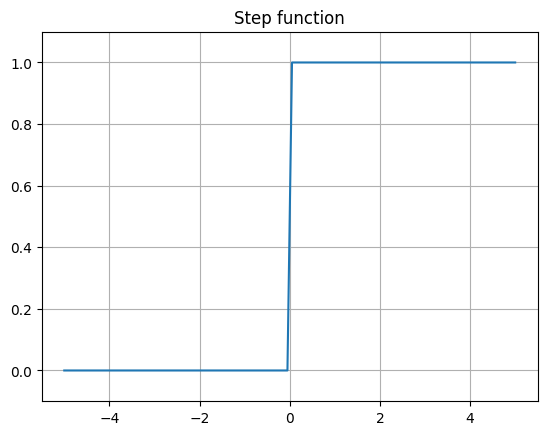

In [4]:
plt.Figure(figsize=(5, 3))
plt.plot(X, step_function(X))
plt.title('Step function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수 (Sigmoid function)
$ f(x) = \frac{1}{1 + e^{-x}} $

- 출력범위: (0, 1)
- 은닉층보다 출력층에서 더 쓰임
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(vanishing Gradient) 문제 발생 가능

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

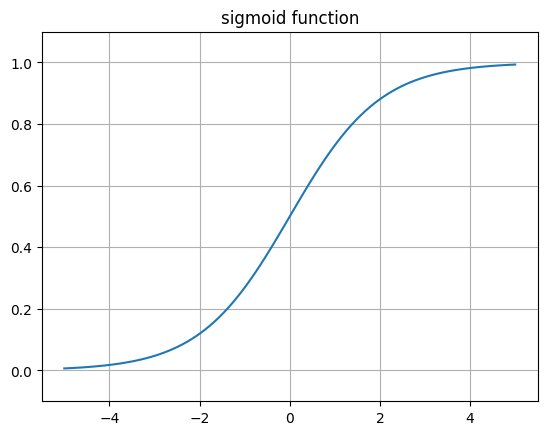

In [6]:
plt.Figure(figsize=(5, 3))
plt.plot(X, sigmoid(X))
plt.title('sigmoid function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 하이퍼볼릭 탄젠트 함수 (Hyperbolic tangent function, tanh)
$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

- 출력범위: (-1, 1)
- sigmoid의 편향학습(sigmoid 중심이 0이 아니여서 양수에 치우침) 문제를 해결가능
- 기울기 소실 문제 여전히 발생 가능


In [7]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# numpy로도 간단히 구현가능
# def tanh(x):
#     return np.tanh(x)

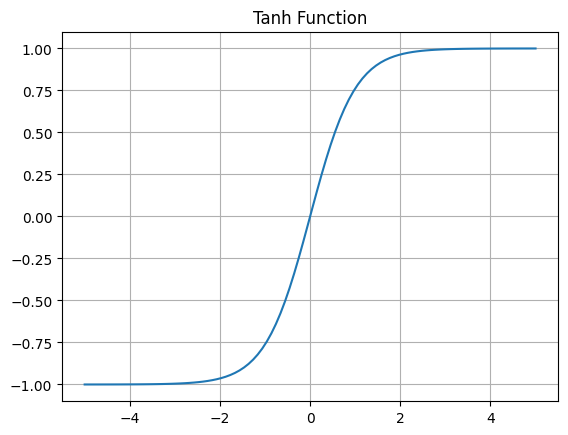

In [8]:
plt.Figure(figsize=(5, 3))
plt.plot(X, tanh(X))
plt.title("Tanh Function")
plt.grid()
plt.show()

### ReLU (Rectified Linear Unit)
$ f(x) = \max(0, x) $

- 출력범위: $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLu) 문제발생 가능

In [9]:
def relu(x):
    return np.maximum(0, x)

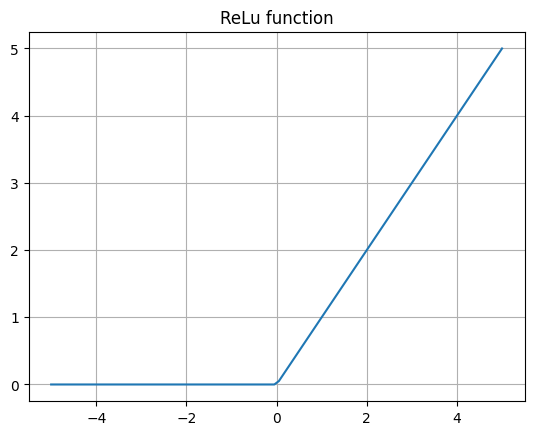

In [10]:
plt.Figure(figsize=(5, 3))
plt.plot(X, relu(X))
plt.title("ReLu function")
plt.grid()
plt.show()

### Leaky ReLU

$ f(x) = \begin{cases} x, & x \geq 0 \\ \alpha x, & x < 0\end{cases}$

- 출력범위: ($-\infty, \infty$)
- ReLu의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$를 적용 ($\alpha$는 일반적으로 0.01)

In [11]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, x * alpha)

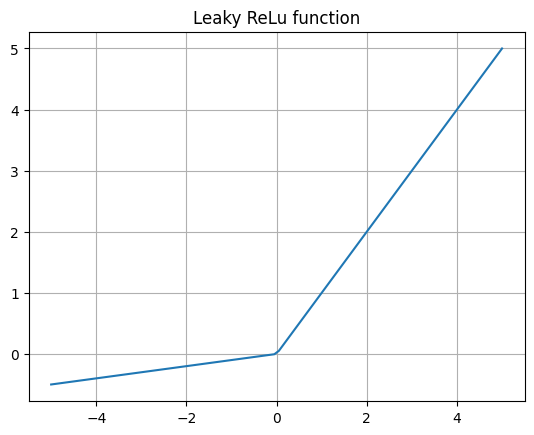

In [12]:
plt.Figure(figsize=(5, 3))
plt.plot(X, leaky_relu(X, alpha=0.1))
plt.title("Leaky ReLu function")
plt.grid()
plt.show()

---

In [13]:
np.random.seed(42)

X = np.random.uniform(-5, 5, size=10)

df = pd.DataFrame({
    '(X)': X,
    'Step': step_function(X),
    'Sigmoid': sigmoid(X),
    'Tanh': tanh(X),
    'ReLU': relu(X),
    'Leaky ReLU': leaky_relu(X)
})

df

,(X),Step,Sigmoid,Tanh,ReLU,Leaky ReLU
0,-1.254599,0,0.221905,-0.849568,0.000000,-0.012546
1,4.507143,1,0.989090,0.999757,4.507143,4.507143
2,2.319939,1,0.910515,0.980867,2.319939,2.319939
3,0.986585,1,0.728413,0.755902,0.986585,0.986585
4,-3.439814,0,0.031074,-0.997945,0.000000,-0.034398
5,-3.440055,0,0.031067,-0.997946,0.000000,-0.034401
6,-4.419164,0,0.011901,-0.999710,0.000000,-0.044192
7,3.661761,1,0.974956,0.998681,3.661761,3.661761
8,1.011150,1,0.733245,0.766237,1.011150,1.011150
9,2.080726,1,0.889016,0.969308,2.080726,2.080726


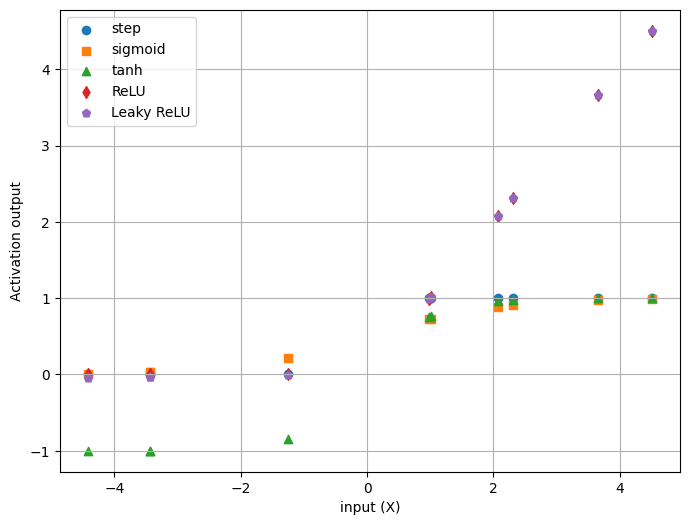

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter(df["(X)"], df["Step"], marker='o', label='step')
plt.scatter(df["(X)"], df["Sigmoid"], marker='s', label='sigmoid')
plt.scatter(df["(X)"], df["Tanh"], marker='^', label='tanh')
plt.scatter(df["(X)"], df["ReLU"], marker='d', label='ReLU')
plt.scatter(df["(X)"], df["Leaky ReLU"], marker='p', label='Leaky ReLU')

plt.xlabel('input (X)')
plt.ylabel('Activation output')
plt.legend()
plt.grid()
plt.show()


---

### 기울기 소실/폭발
가중치/절편을 업데이트하기 위한 미분값(기울기/Gradient)
- 이 기울기 값이 너무 작아지면, 가중치/절편을 업데이트 할 수 없다. &rarr; 기울기 소실문제
- 이 기울기 값이 너무 커지면, 가중치/절편에 대한 최적화가 어렵다.  &rarr; 기울기 폭발문제

In [15]:
np.random.seed(42)

# 층 개수
n_layers = 10
input_dim = 10

# 초기 가중치/절편
W = np.random.randn(input_dim, input_dim) * 0.01
X = np.random.randn(input_dim, 1)

# 순전파
for i in range(n_layers):
    X = sigmoid(np.dot(W, X))
    print(f'{i + 1}층 출력평균: {np.mean(X)}')

1층 출력평균: 0.4994682942673296
2층 출력평균: 0.49870536822924205
3층 출력평균: 0.49870284825750544
4층 출력평균: 0.49870296663110353
5층 출력평균: 0.4987029662986358
6층 출력평균: 0.4987029662954603
7층 출력평균: 0.4987029662954693
8층 출력평균: 0.4987029662954693
9층 출력평균: 0.4987029662954693
10층 출력평균: 0.4987029662954693


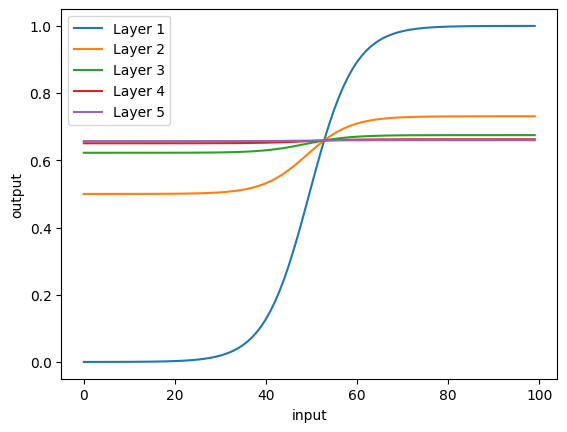

In [16]:
# 시그모이드 활성화함수 n번 사용한 경우 시각화
# layer가 깊어질수록 기울기 손실
x = np.linspace(-10, 10, 100)

for i in range(1, 6):
    x = sigmoid(x)
    plt.plot(x, label=f'Layer {i}')

plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.show()

### 기울기 소실 문제 해결
sigmoid 외의 활성화 함수
잔차연결 (skip connection)

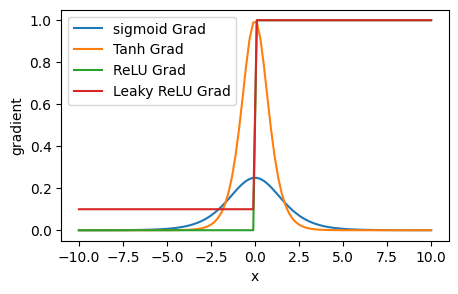

In [17]:
# 활성화 함수에 대한 도함수: 미분

# sigmoid의 양 끝쪽 부분의 기울기가 0에 가까움. 기울기 소실
def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

# 
def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

# 기울기는 어차피 0 또는 1임
def relu_grad(x):
    return np.where(x >= 0, 1, 0)

def leaky_relu_grad(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x <= 0] = alpha
    return dx

x = np.linspace(-10, 10, 100)
plt.figure(figsize=(5, 3))

plt.plot(x, sigmoid_grad(x), label='sigmoid Grad')
plt.plot(x, tanh_grad(x), label='Tanh Grad')
plt.plot(x, relu_grad(x), label='ReLU Grad')
plt.plot(x, leaky_relu_grad(x, 0.1), label='Leaky ReLU Grad')
plt.xlabel('x')
plt.ylabel('gradient')
plt.legend()
plt.show()

In [30]:
# 잔차연결 Residual Connection (skip connection)
import torch
import torch.nn as nn # neural network

torch.manual_seed(42) # torch 난수시드 고정

n_layers = 10
input_dim = 10

# 일반 네트워크
class PlainNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(input_dim, input_dim) for _ in range(n_layers)
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = self.relu(x)
        return x
    

# 잔차연결 네트워크
class ResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(input_dim, input_dim) for _ in range(n_layers)
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            out = layer(x)
            out = self.relu(out)
            x += out # 출력결과와 입력값을 더해서 최종출력
        return x
    
plain_model = PlainNet()
res_model = ResNet()
criterion = nn.MSELoss() # 손실함수

In [33]:
# 입력값/타겟값
x = torch.randn(1, input_dim) # 평균 0, 표준편차 1인 정규분포에서 샘플링
y = torch.randn(1, input_dim)

# 시각화를 위한 기울기 모음
plain_grad = []
res_grad = []

# 1. 일반모델 학습
output = plain_model(x)
loss = criterion(output, y)
loss.backward() # 오차에 대한 기울기 계산

print('일반모델 기울기')
for i, layer in enumerate(plain_model.layers):
    print(f'Layer {i + 1}: {layer.weight.grad.norm():.4f}')
    plain_grad.append(layer.weight.grad.norm().item())


# 2. 잔차연결모델 학습
output = res_model(x)
loss = criterion(output, y)
loss.backward() # 오차에 대한 기울기 계산

print('잔차모델모델 기울기')
for i, layer in enumerate(res_model.layers):
    print(f'Layer {i + 1}: {layer.weight.grad.norm():.4f}')
    plain_grad.append(layer.weight.grad.norm().item())

일반모델 기울기
Layer 1: 0.0001
Layer 2: 0.0001
Layer 3: 0.0001
Layer 4: 0.0002
Layer 5: 0.0011
Layer 6: 0.0037
Layer 7: 0.0161
Layer 8: 0.0516
Layer 9: 0.1348
Layer 10: 0.3097


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [1, 10]], which is output 0 of AddBackward0, is at version 10; expected version 9 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).